### Import Libraries

In [1]:
import pandas as pd
import pathlib
from joblib import load

import sys
sys.path.append("../utils")
from split_utils import get_features_data
from train_utils import get_dataset
from evaluate_utils import class_PR_curves

### Load models and datasets

In [2]:
model_dir = pathlib.Path("../2.train_model/models/")
log_reg_model_path = pathlib.Path(f"{model_dir}/log_reg_model.joblib")
log_reg_model = load(log_reg_model_path)
shuffled_baseline_log_reg_model_path = pathlib.Path(f"{model_dir}/shuffled_baseline_log_reg_model.joblib")
shuffled_baseline_log_reg_model = load(shuffled_baseline_log_reg_model_path)

# load features data from indexes and features dataframe
data_split_path = pathlib.Path("../1.split_data/indexes/data_split_indexes.tsv")
data_split_indexes = pd.read_csv(data_split_path, sep="\t", index_col=0)
features_dataframe_path = pathlib.Path("../0.download_data/data/training_data.csv.gz")
features_dataframe = get_features_data(features_dataframe_path)

train_data = get_dataset(features_dataframe, data_split_indexes, "train")
test_data = get_dataset(features_dataframe, data_split_indexes, "test")

save_dir = pathlib.Path("class_precision_recall_curves/")
save_dir.mkdir(parents=True, exist_ok=True)

### PR Curves for combinations of models and data subsets

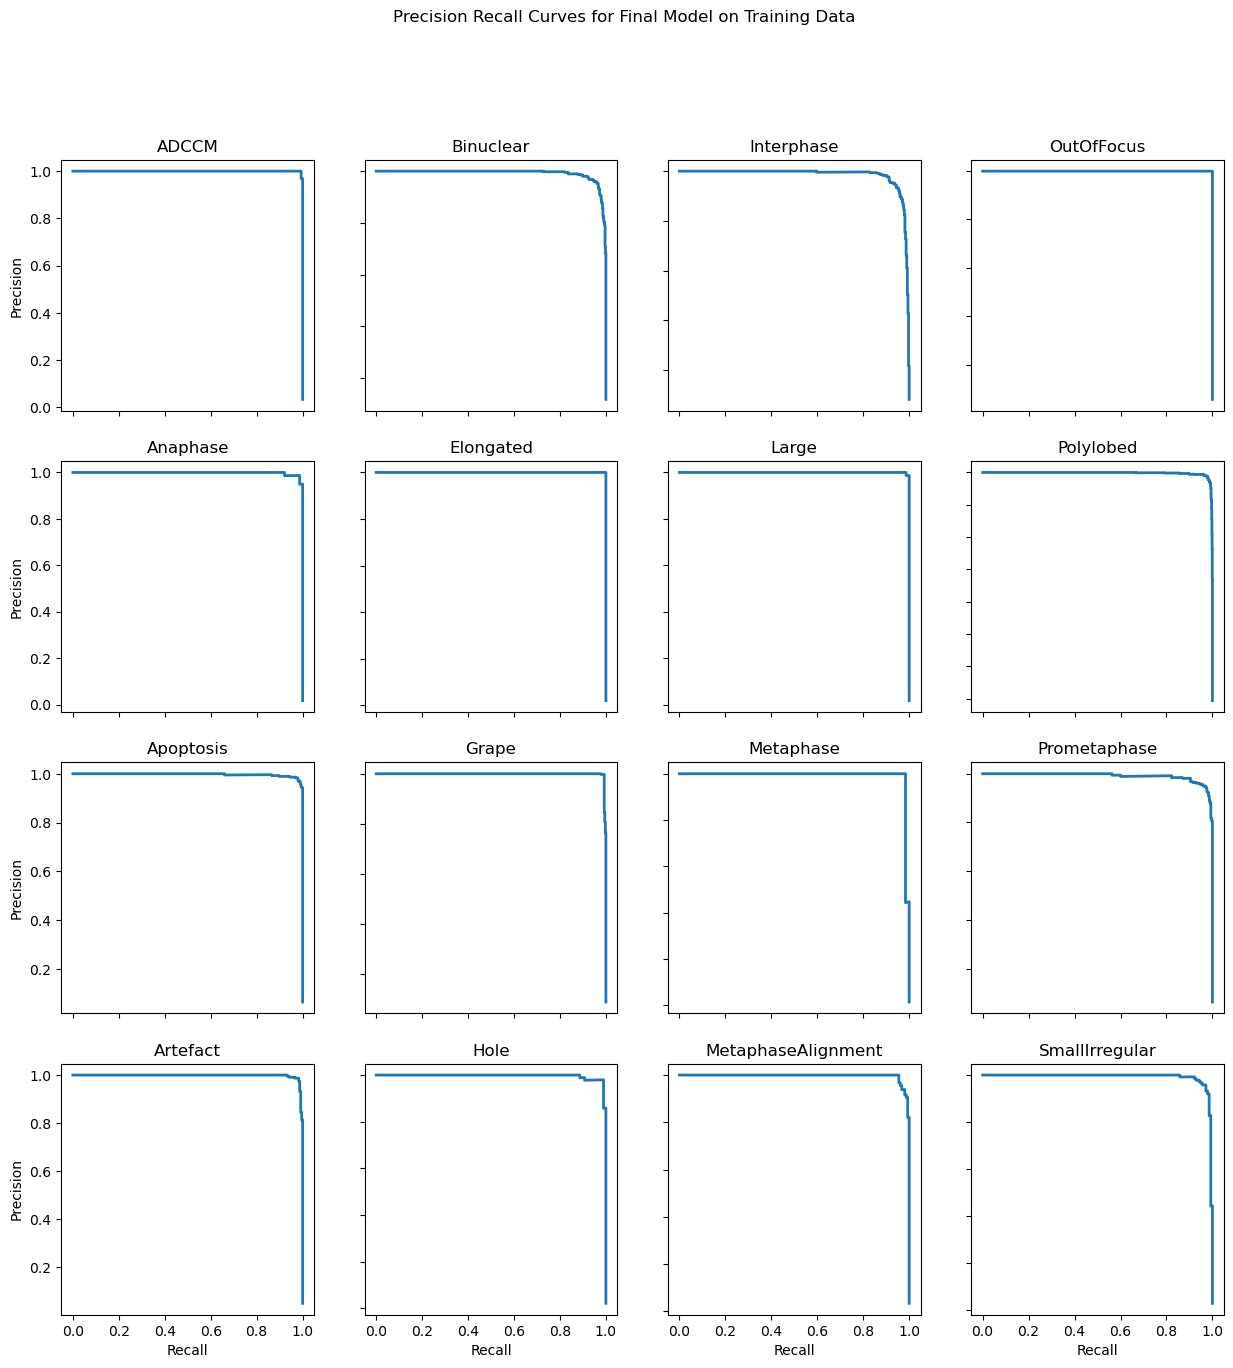

In [3]:
fig, PR_data  = class_PR_curves(train_data, log_reg_model)
fig.suptitle("Precision Recall Curves for Final Model on Training Data")
fig.savefig(f"{save_dir}/final_model_train_data.png")
PR_data.to_csv(f"{save_dir}/final_model_train_data.tsv", sep="\t")

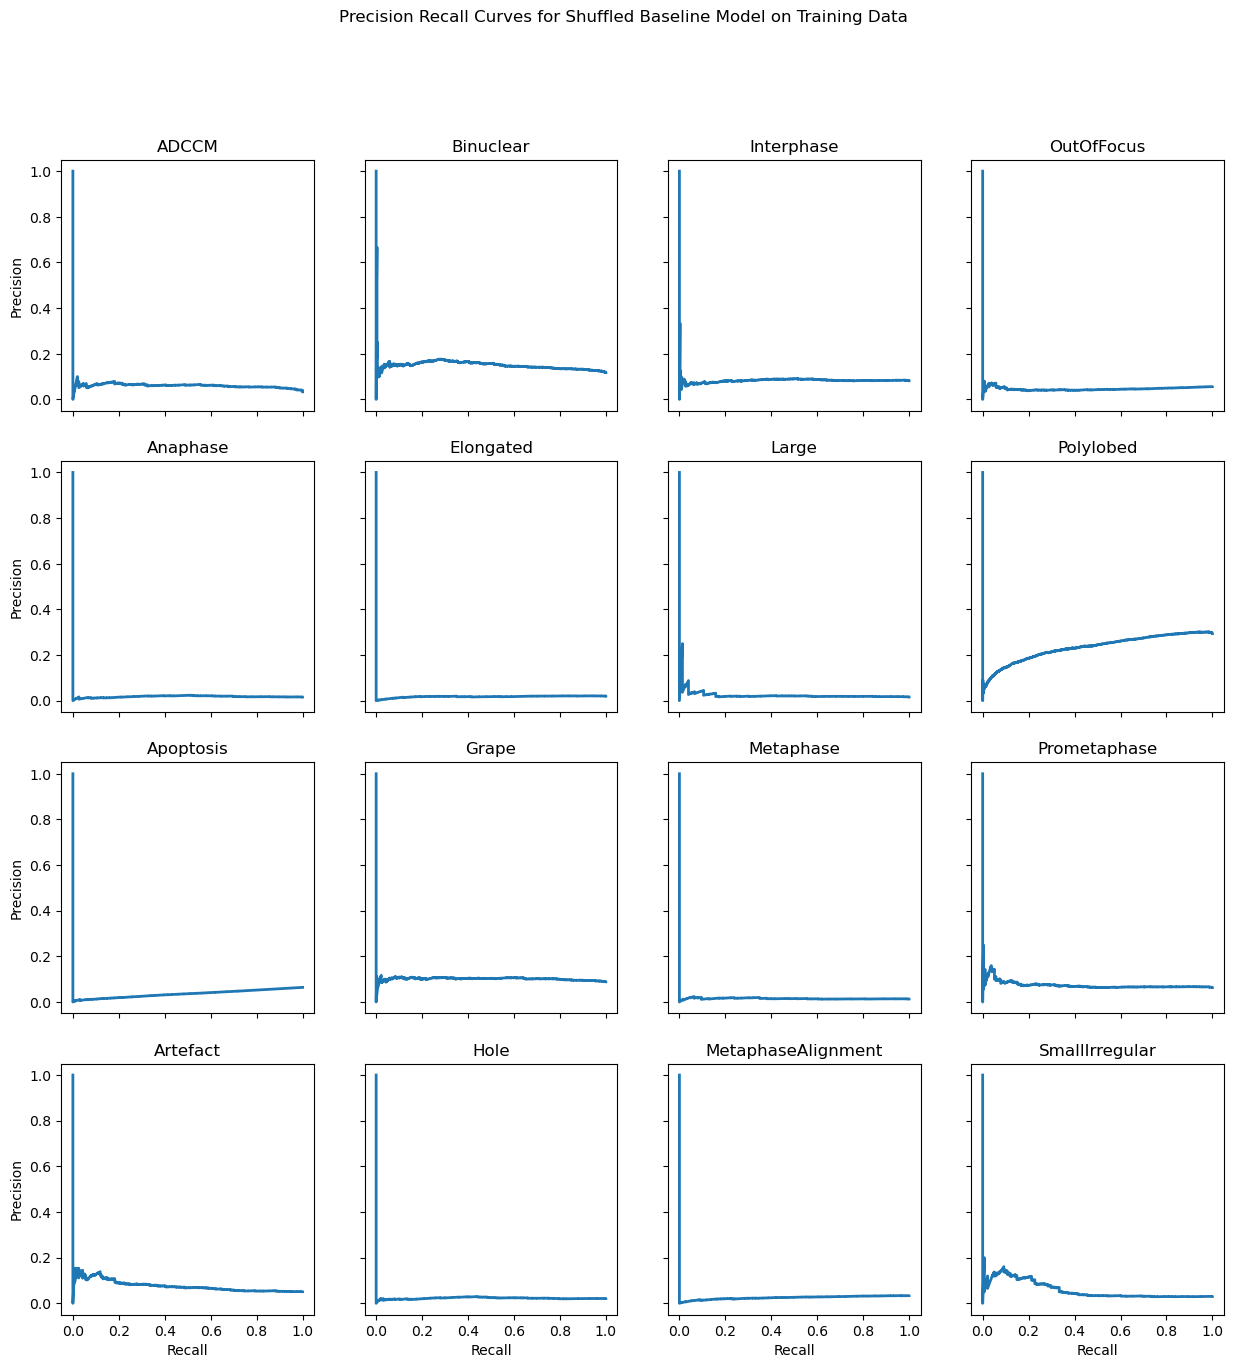

In [4]:
fig, PR_data  = class_PR_curves(train_data, shuffled_baseline_log_reg_model)
fig.suptitle("Precision Recall Curves for Shuffled Baseline Model on Training Data")
fig.savefig(f"{save_dir}/shuffled_baseline_model_train_data.png")
PR_data.to_csv(f"{save_dir}/shuffled_baseline_model_train_data.tsv", sep="\t")

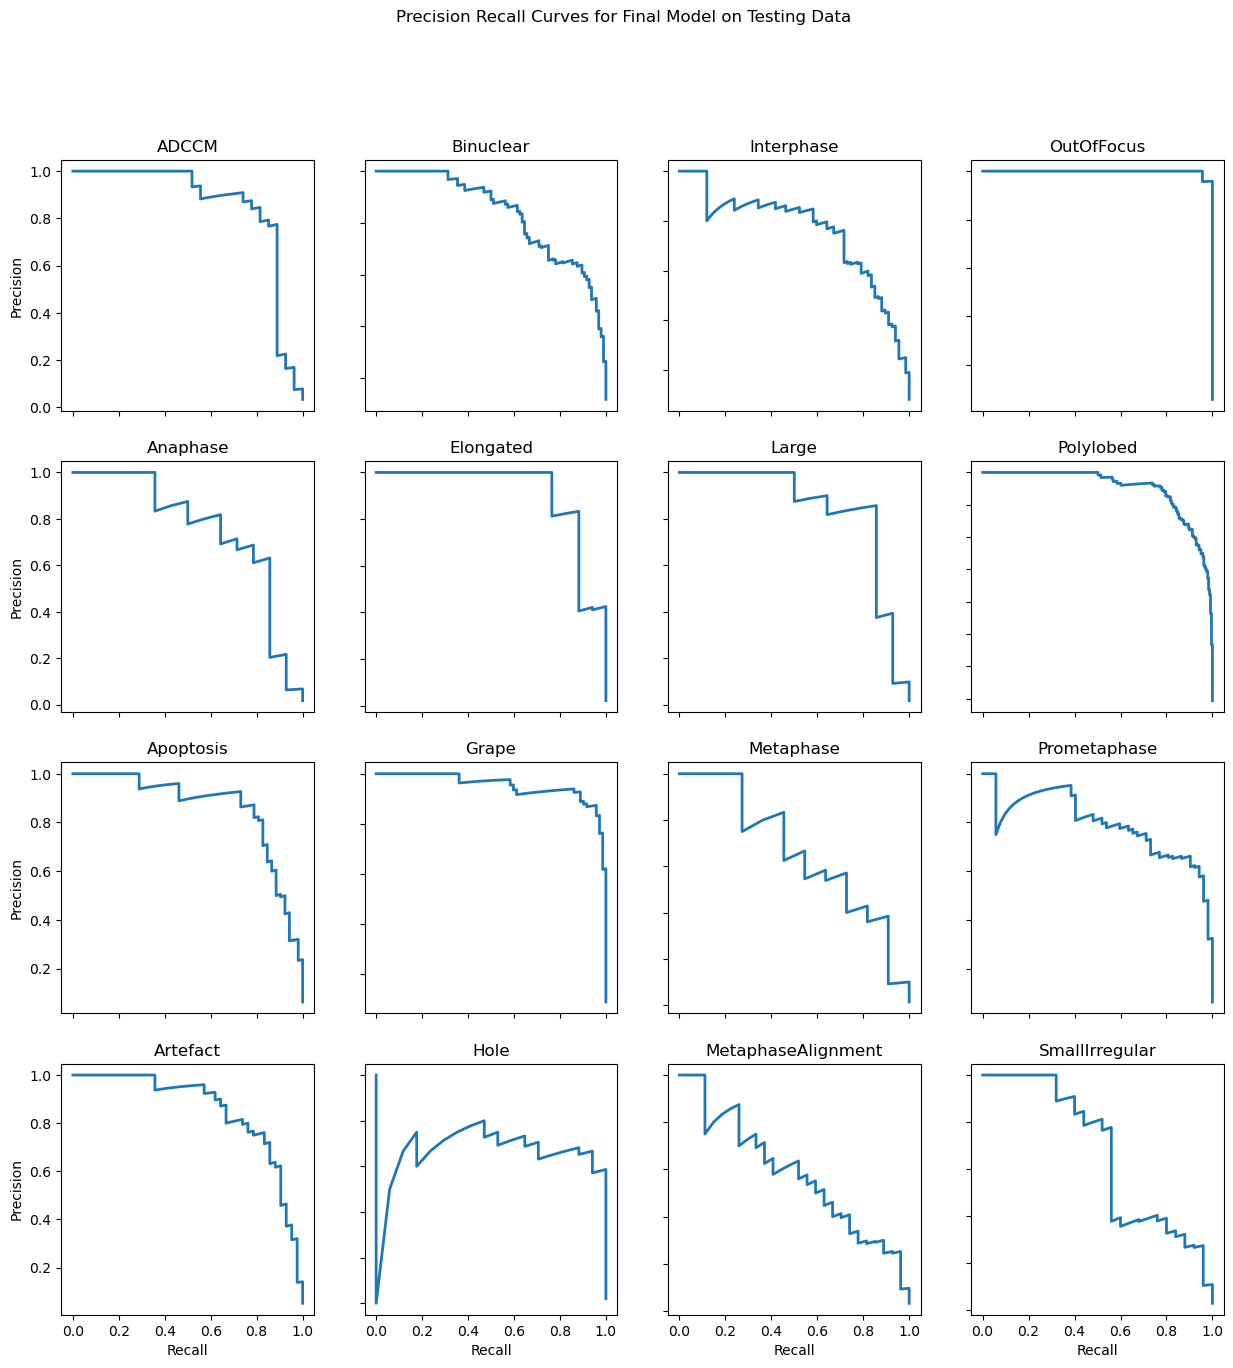

In [5]:
fig, PR_data  = class_PR_curves(test_data, log_reg_model)
fig.suptitle("Precision Recall Curves for Final Model on Testing Data")
fig.savefig(f"{save_dir}/final_model_test_data.png")
PR_data.to_csv(f"{save_dir}/final_model_test_data.tsv", sep="\t")

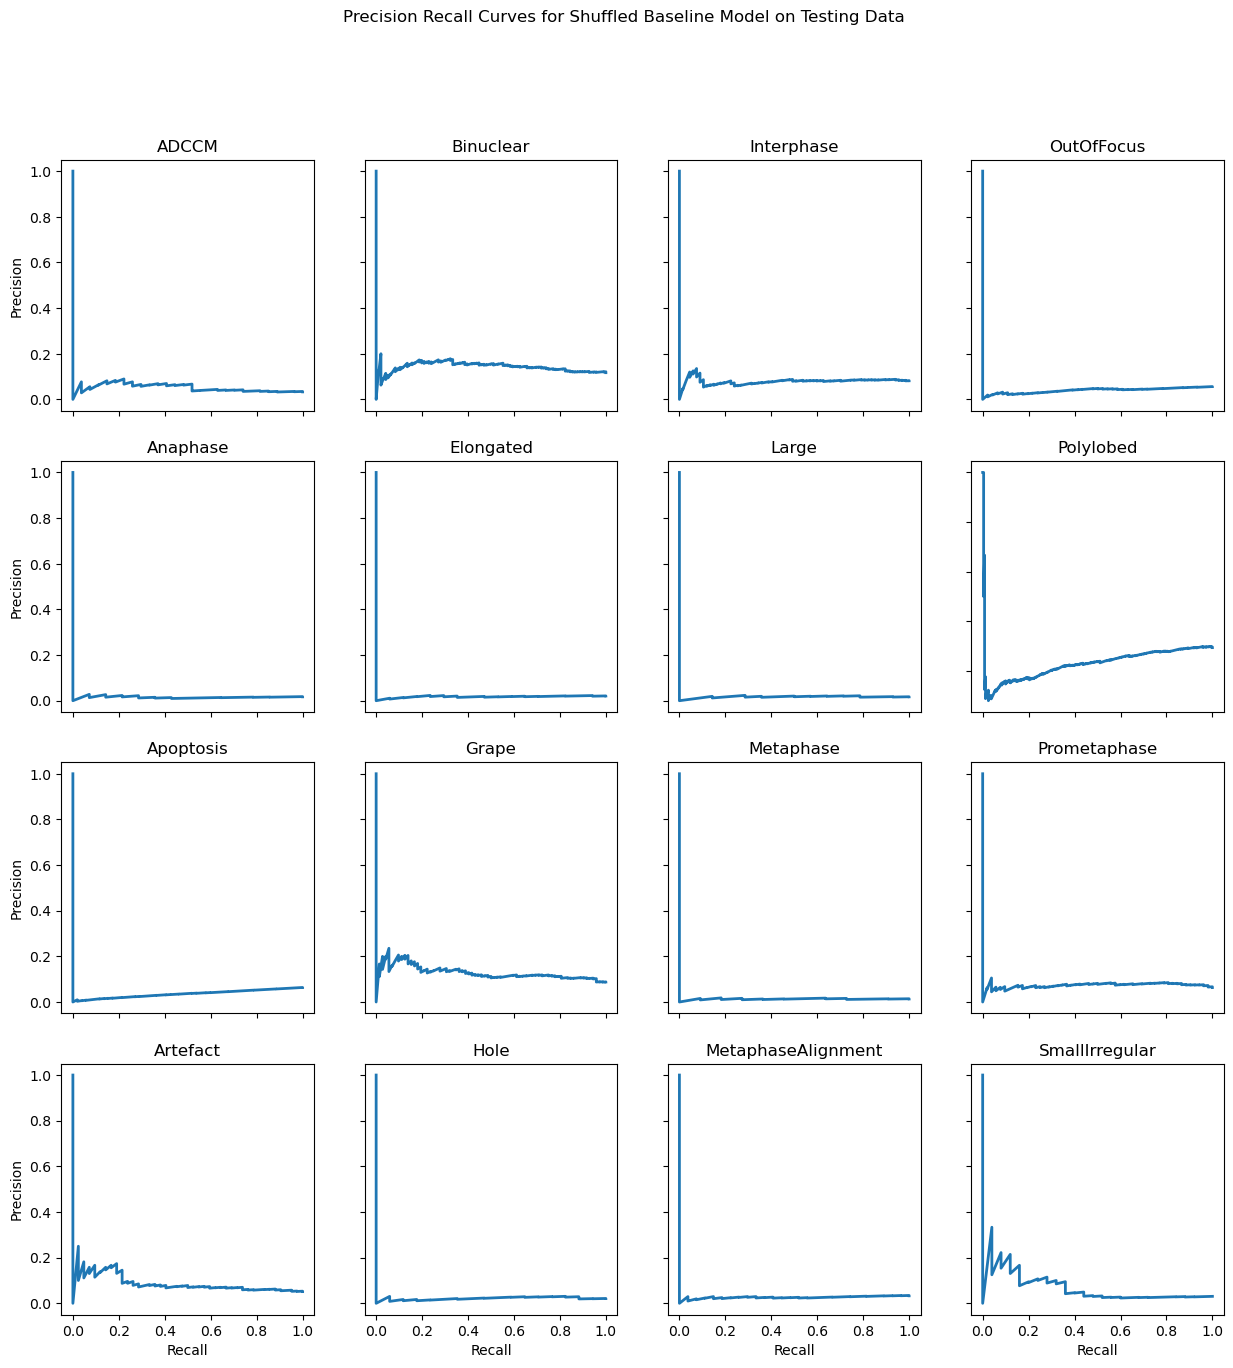

In [6]:
fig, PR_data  = class_PR_curves(test_data, shuffled_baseline_log_reg_model)
fig.suptitle("Precision Recall Curves for Shuffled Baseline Model on Testing Data")
fig.savefig(f"{save_dir}/shuffled_baseline_model_test_data.png")
PR_data.to_csv(f"{save_dir}/shuffled_baseline_model_test_data.tsv", sep="\t")